In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random 

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.iloc[:,0:len(df.columns)-2].values
amt =  df.iloc[:,len(df.columns)-2:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [8]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0])
eig_pairs.reverse()
for i in eig_pairs:
    print(i[0])

1.68411478505233
1.000003511162006
1.0000035111619925
1.0000035111619894
1.0000035111619883
1.000003511161988
1.0000035111619867
1.000003511161986
1.0000035111619858
1.0000035111619854
1.000003511161985
1.0000035111619847
1.0000035111619843
1.0000035111619838
1.0000035111619832
1.000003511161983
1.000003511161983
1.0000035111619825
1.000003511161982
1.0000035111619818
1.0000035111619812
1.000003511161981
1.000003511161981
1.0000035111619796
1.0000035111619787
1.0000035111619785
1.0000035111619776
1.00000351116196
0.3158922372716376


In [9]:
 matrix_w = np.hstack((eig_pairs[0][1].reshape(29,1), 
                      eig_pairs[1][1].reshape(29,1), 
                      eig_pairs[2][1].reshape(29,1), 
                      eig_pairs[3][1].reshape(29,1), 
                      eig_pairs[4][1].reshape(29,1), 
                      eig_pairs[5][1].reshape(29,1)))

#print(matrix_w)

In [10]:
matrix_new = X_std.dot(matrix_w)

In [11]:
 matrix_final = []
for i,j in zip(matrix_new,amt):
    i = np.append(i, j)
    matrix_final.append(i)

In [35]:
centers = []
for i in range(6):
    a = random.randint(0,len(matrix_final))
    centers.append(matrix_final[a])

In [36]:
centers

[array([ 2.05029901e+00, -1.66059942e-01,  1.03870109e-01, -9.75792864e-01,
        -6.32775463e-01, -9.76215913e-01,  1.45440000e+02]),
 array([ 8.69927752e-01, -1.06127237e-01, -1.00259112e+00,  1.97837933e-01,
         1.05494258e+00,  1.39719992e+00,  2.84980000e+02]),
 array([-0.12504406, -0.39811235, -0.17270392,  0.52148496, -0.44925099,
        -0.69220338,  2.69      ]),
 array([0.69261323, 0.49153131, 0.44598478, 0.04758478, 0.21995596,
        0.49067666, 1.        ]),
 array([ 6.42983929e-05, -2.70911547e+00,  2.88400832e-01,  6.78611028e-01,
        -2.49752685e-02,  4.69382844e-01,  3.60000000e+01]),
 array([ 1.23063841,  0.21291261,  0.88036676, -0.34546893, -0.38979796,
        -0.47134587,  5.09      ])]

In [37]:
clusters = []
for i in centers:
    clusters.append([])

In [38]:
def euclidean_distance(x,y):
    count = 0
    #print(x,y)
    for i,j in zip(x,y):
        
        count += (i - j) * (i - j)
    return math.sqrt(count)

In [39]:
def min_distance(x):
    return x.index(min(x))

In [50]:
min_list = []
while(True):
    for i in range(len(matrix_final)):
        for j in centers:
            min_list.append(euclidean_distance(matrix_final[i],j))
        l = min_distance(min_list)
        clusters[l].append(i)
        min_list = [] 
    temp = []
    for i in clusters:
        d = 0
        count  = 0
        for j in i:
            d += matrix_final[j]
            count += 1
        temp.append(d/count)
    flag = 1
    for i,j in zip(centers,temp):
        if (i == j).all:
            flag = 0
    if flag == 0:
        break
    centers = np.copy(temp)
    
        

In [51]:
for i in range(len(clusters)):
    print("Cluster {}".format(i+1))
    for j in range(10):
        print(matrix_final[clusters[i][j]])

Cluster 1
[  2.54790534   0.61554486  -0.33816959  -0.34335822  -0.60123762
  -0.63940331 149.62      ]
[ 1.79567516e+00 -1.55277833e-01 -2.73145213e+00  1.32651422e+00
  3.12538202e-01 -1.12870989e-01  1.23500000e+02]
[ 1.19435676  0.24527408 -0.23943333  0.85473459  0.50600038  0.62366917
 93.2       ]
[ 2.13413983e+00 -5.99872519e-01  3.74639744e-01 -6.22413722e-01
  3.80922811e-02 -2.63306468e-01  1.21500000e+02]
[  1.76901864   0.16268873   0.5261202   -0.34230708  -0.52014838
  -0.25087932 120.96      ]
[ 1.75678753e+00 -1.32527813e-01  4.91645904e-01 -2.28990861e-02
  1.28053556e+00  9.56872281e-01  1.69050000e+02]
[ 1.92829002e+00 -6.94209266e-02 -2.22219639e+00  2.36026314e-01
  6.87801968e-01  1.13864878e+00  9.69400000e+01]
[ 2.08965753e+00  8.77207624e-01 -1.57457583e-02  1.91970447e-01
  3.65166008e-01 -3.54828773e-01  1.35510000e+02]
[ 1.89117083e+00  1.57409104e+00  8.86858326e-02  3.49467164e-01
 -6.10977418e-01 -7.57815079e-01  2.00010000e+02]
[  2.11785017   0.8092919

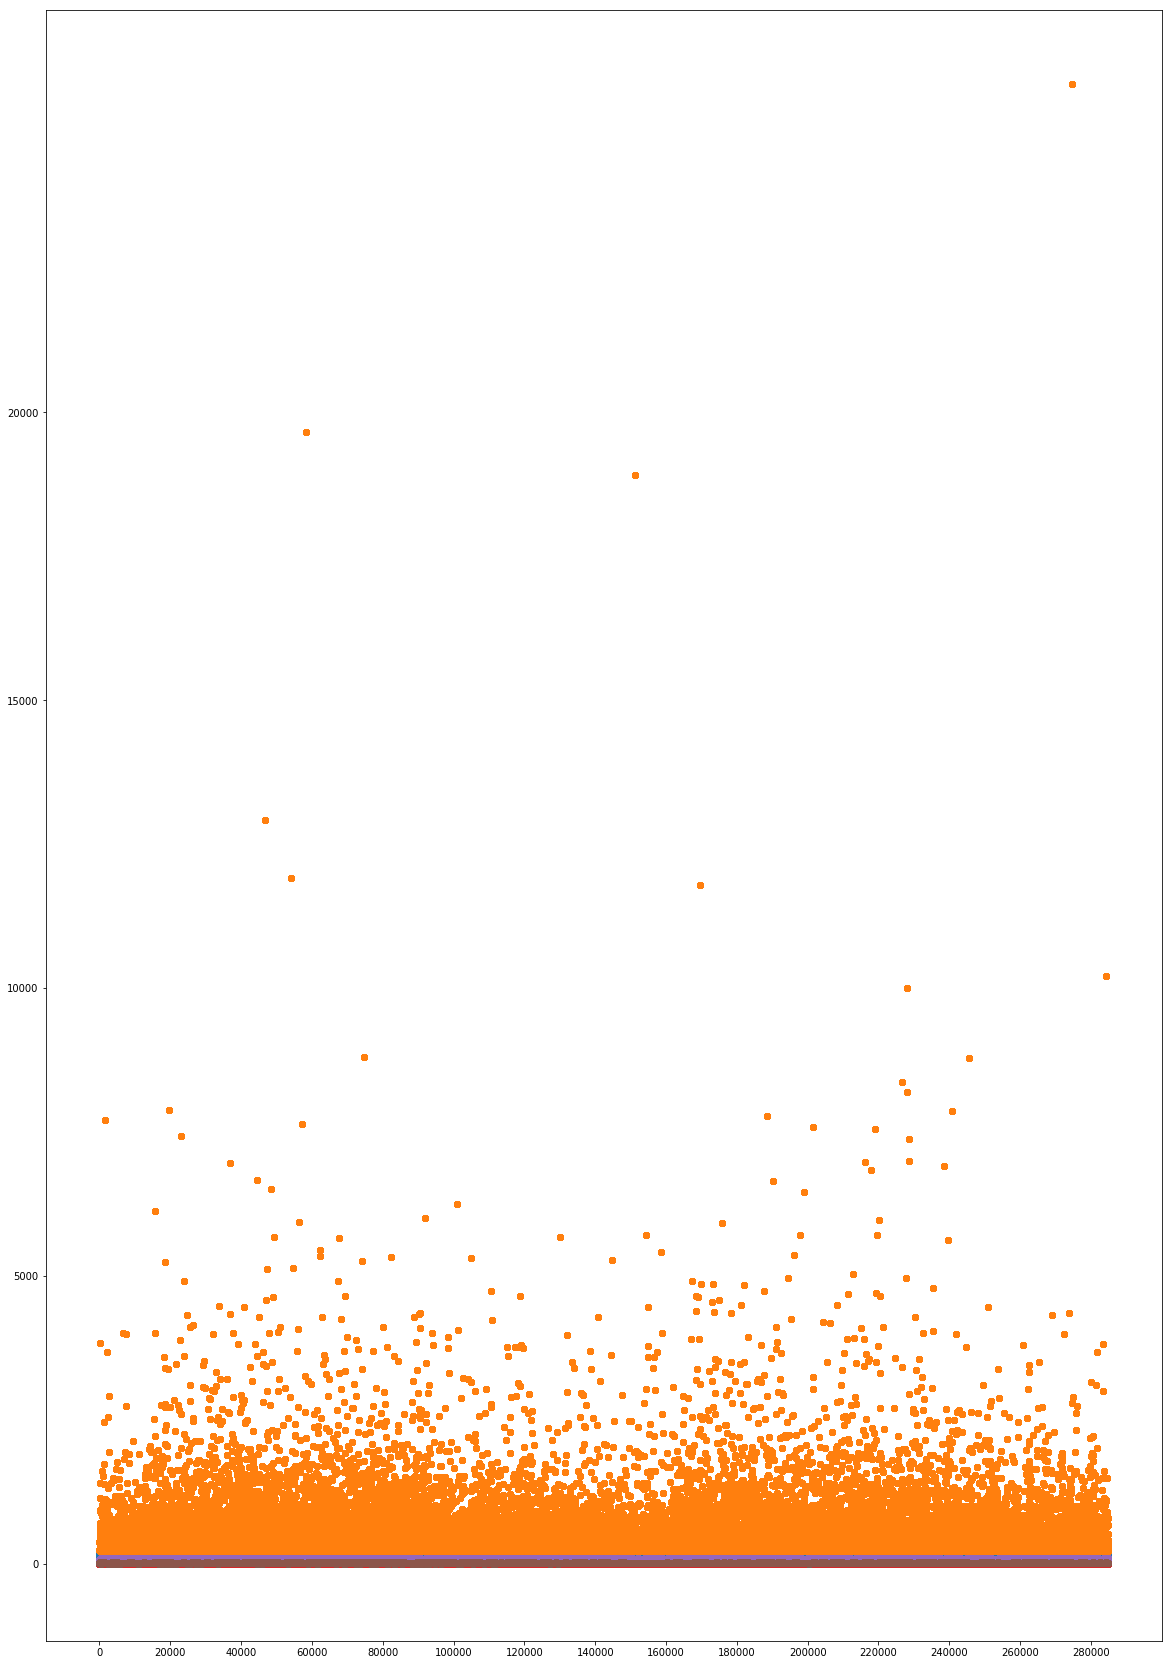

In [52]:
a = []
plt.figure(figsize=(20,30))
plt.yticks(np.arange(0, 25000, 5000))
plt.xticks(np.arange(0, 284807, 20000))
for i in range(0,len(clusters)):
    for j in clusters[i]:
        a.append(matrix_final[j][6])
    plt.scatter(clusters[i],a)
    a=[]